## Creating figures summarising the train/evaluation data sets

In [16]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
import os, sys
sys.path.append('../scripts/')
import numpy as np
import matplotlib.pyplot as plt
import rasterio, rasterio.plot
import xarray as xr
import rioxarray as rxr
from tqdm import tqdm
import pandas as pd
import time, datetime
import geopandas as gpd
import loadpaths
import land_cover_analysis as lca
import land_cover_visualisation as lcv
import land_cover_models as lcm
from torch.utils.data import TensorDataset, DataLoader

path_dict = loadpaths.loadpaths()

In [18]:
df_pd_outline = lca.load_pols(path_dict['pd_outline'])
df_eval_tiles_outline = lca.load_pols('../content/evaluation_sample_50tiles/evaluation_sample_50tiles.shp')

In [22]:
df_lc_80s[df_lc_80s['LC_D_80'] == 'Unclassified Land']

,AREA,PERIMETER,LC_N_80,LC_D_80,MI_PRINX,geometry,Class_Code
14,99546.356225,4890.684950,38,Unclassified Land,15,"POLYGON ((404510.197 410237.320, 404498.984 41...",I
262,18295.437903,1045.346586,38,Unclassified Land,263,"POLYGON ((401362.356 403379.663, 401375.565 40...",I
319,92139.731007,4646.589134,38,Unclassified Land,320,"POLYGON ((403931.146 402121.613, 403939.284 40...",I
423,223738.783350,10145.584512,38,Unclassified Land,424,"POLYGON ((409544.714 400309.052, 409540.138 40...",I
518,5737.097397,321.688815,38,Unclassified Land,519,"POLYGON ((407916.627 399349.977, 407895.058 39...",I
536,15844.407655,741.993372,38,Unclassified Land,537,"POLYGON ((407625.321 399078.014, 407601.971 39...",I
564,2734.627676,222.242438,38,Unclassified Land,565,"POLYGON ((407199.785 398981.162, 407234.052 39...",I
654,38072.720437,1101.952281,38,Unclassified Land,655,"POLYGON ((404027.820 398004.452, 404051.211 39...",I
710,18517.783140,1228.110300,38,Unclassified Land,711,"POLYGON ((403514.268 397562.338, 403526.470 39...",I
1435,40207.530469,2544.470566,38,Unclassified Land,1436,"POLYGON ((417003.369 391739.295, 416987.159 39...",I


In [23]:
## Save list to file:
# lca.save_tile_names_to_list(list_tile_names=list(df_tiles_eval['PLAN_NO'].unique()), text_filename='content/evaluation_sample_50tiles/evaluation_sample_50tiles_list.txt')
 
no_class_threshold = 1.0
 ## LC polygons:
df_lc_80s, mapping_class_inds = lca.load_landcover(pol_path=path_dict['lc_80s_path'])
df_lc_80s = lca.add_main_category_column(df_lc=df_lc_80s)
# df_lc_2022 = lca.load_pols(pol_path=path_dict['evaluation_50tiles_polygons'])

## Get list of tile names from text file:
list_ds_names = ['eval', 'all']#, 'cde_training']
dict_ds_tile_names_file = {'cde_training': '/home/tplas/repos/cnn-land-cover/content/CDE_training_tiles/CDE_training_tiles.shp',
                           'eval': '/home/tplas/repos/cnn-land-cover/content/evaluation_sample_50tiles/evaluation_sample_50tiles_list.txt'}
dict_ds_expected_n_tiles = {'eval': 50}
dict_ds_tile_names = {}
dict_df_tiles = {}
dict_dict_intersect_pols = {}
dict_df_class_distr = {}
for name_ds in list_ds_names:
    print(f'\nNow loading {name_ds} tiles.')

    if name_ds != 'all':
        if dict_ds_tile_names_file[name_ds][-4:] == '.txt':
            ## Load list of tile names:
            with open(dict_ds_tile_names_file[name_ds], 'r') as f:
                tmp = f.readlines()
            dict_ds_tile_names[name_ds] = [x.rstrip('\n') for x in tmp]

            ## Select tiles by name & save as new shp file
            dict_df_tiles[name_ds] = lca.select_tiles_from_list(list_tile_names=dict_ds_tile_names[name_ds], 
                                        save_new_shp=False,
                                        new_shp_filename=dict_ds_tile_names_file[name_ds].rstrip('.txt').rstrip('_list'))

        elif dict_ds_tile_names_file[name_ds][-4:] == '.shp':
            dict_df_tiles[name_ds] = lca.load_pols(dict_ds_tile_names_file[name_ds])
    elif name_ds == 'all':
        dict_df_tiles[name_ds] = lca.get_shp_all_tiles()

    if name_ds in dict_ds_expected_n_tiles.keys():
        assert len(dict_df_tiles[name_ds]) == dict_ds_expected_n_tiles[name_ds], 'Not expected number of tiles. Perhaps this is second pass?'

    dict_dict_intersect_pols[name_ds] = lca.get_pols_for_tiles(df_pols=df_lc_80s, df_tiles=dict_df_tiles[name_ds], 
                                                               col_name='PLAN_NO', verbose=0)
    
    ## Calculate distribution of classes for each tile:
    dict_df_class_distr[name_ds] = lca.create_df_with_class_distr_per_tile(dict_dfs=dict_dict_intersect_pols[name_ds], 
                                                         all_class_names=list(df_lc_80s['LC_D_80'].unique()) + ['0'],  # the '0' is for newly added no-class, due to being outside of PD outline (eg outside park)
                                                         no_class_threshold=no_class_threshold)
    dict_df_tiles[name_ds] = dict_df_tiles[name_ds][np.isin(dict_df_tiles[name_ds]['PLAN_NO'], dict_df_class_distr[name_ds]['tile_name'])]
    assert len(dict_df_tiles[name_ds]) == len(dict_df_class_distr[name_ds])

    ## Get rid of '0' column (because that is area outside park outline):
    dict_df_class_distr[name_ds] = dict_df_class_distr[name_ds].drop(columns=['0'])



Now loading eval tiles.


100%|██████████| 50/50 [00:01<00:00, 33.17it/s]
50it [00:00, 271.83it/s]



Now loading all tiles.


100%|██████████| 2125/2125 [00:50<00:00, 42.42it/s] 
2125it [00:07, 267.10it/s]


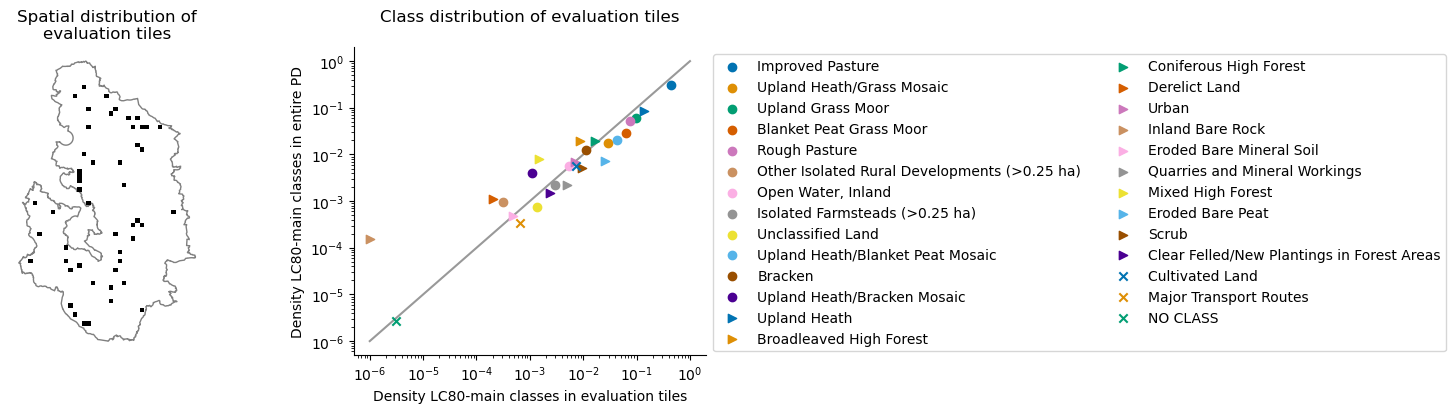

In [38]:
save_fig = True

fig, ax = plt.subplots(1, 2, figsize=(10, 4))
df_pd_outline.plot(ax=ax[0], facecolor='none', edgecolor='grey')
df_eval_tiles_outline.plot(ax=ax[0], facecolor='k')
ax[0].axis('off')
ax[0].set_title('Spatial distribution of\nevaluation tiles')

lcv.plot_scatter_class_distr_two_dfs(df_1=dict_df_class_distr['eval'], label_1='Evaluation',
                                     df_2=dict_df_class_distr['all'], label_2='Entire PD',
                                     ax=ax[1], lc_name='LC80-main',
                                     save_fig=False)
ax[1].set_title('Class distribution of evaluation tiles\n')
ax[1].set_xlabel('Density LC80-main classes in evaluation tiles')
ax[1].set_ylabel('Density LC80-main classes in entire PD')

if save_fig:
    plt.savefig(f'../figures/fig_eval_tiles_distr.pdf', bbox_inches='tight')